### Dataset Information

#### In this project, the dataset was sourced from Kaggle and is named Emergency Vehicles Identification. The dataset can be accessed via the following link: Emergency Vehicles Identification. The original dataset contains 1,646 rows and 2 columns (image_name and emergency_or_not).

#### Additionally, the train_vt.csv file was created based on the Kaggle dataset, additional images were sourced from the Police Car Website (https://www.policecarwebsite.net/index.html) to enhance the dataset.In train_vt.csv, the dataset is expanded to include different types of vehicles such as Normal Vehicle, Police Car, Ambulance, and Fire Truck. This file contains 3 columns: image_name, emergency_or_not, and vehicle_type. The train_vt.csv file has 3,979 rows and 3 columns.


In [16]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from sklearn.model_selection import train_test_split


### Importing and exploring dataset

(1646, 2)
 Class distribution in train.csv file 
 0    965
1    681
Name: emergency_or_not, dtype: int64


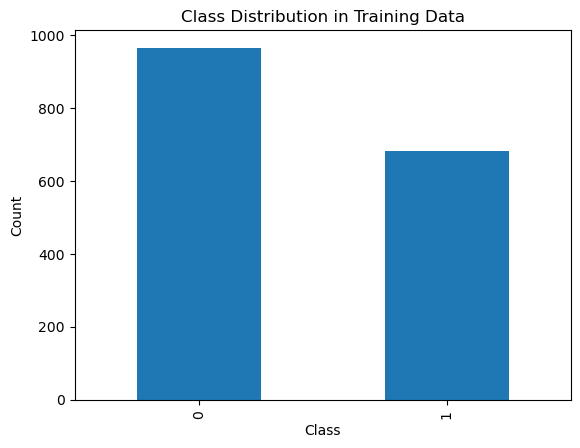

In [17]:
# Load the train dataset
train_df = pd.read_csv('train.csv')
print(train_df.shape)

# Check the distribution of classes
class_distribution = train_df['emergency_or_not'].value_counts()
print(" Class distribution in train.csv file \n",class_distribution)
fig, ax = plt.subplots()
class_distribution.plot(kind='bar', ax=ax)
ax.set_title('Class Distribution in Training Data')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
plt.show()


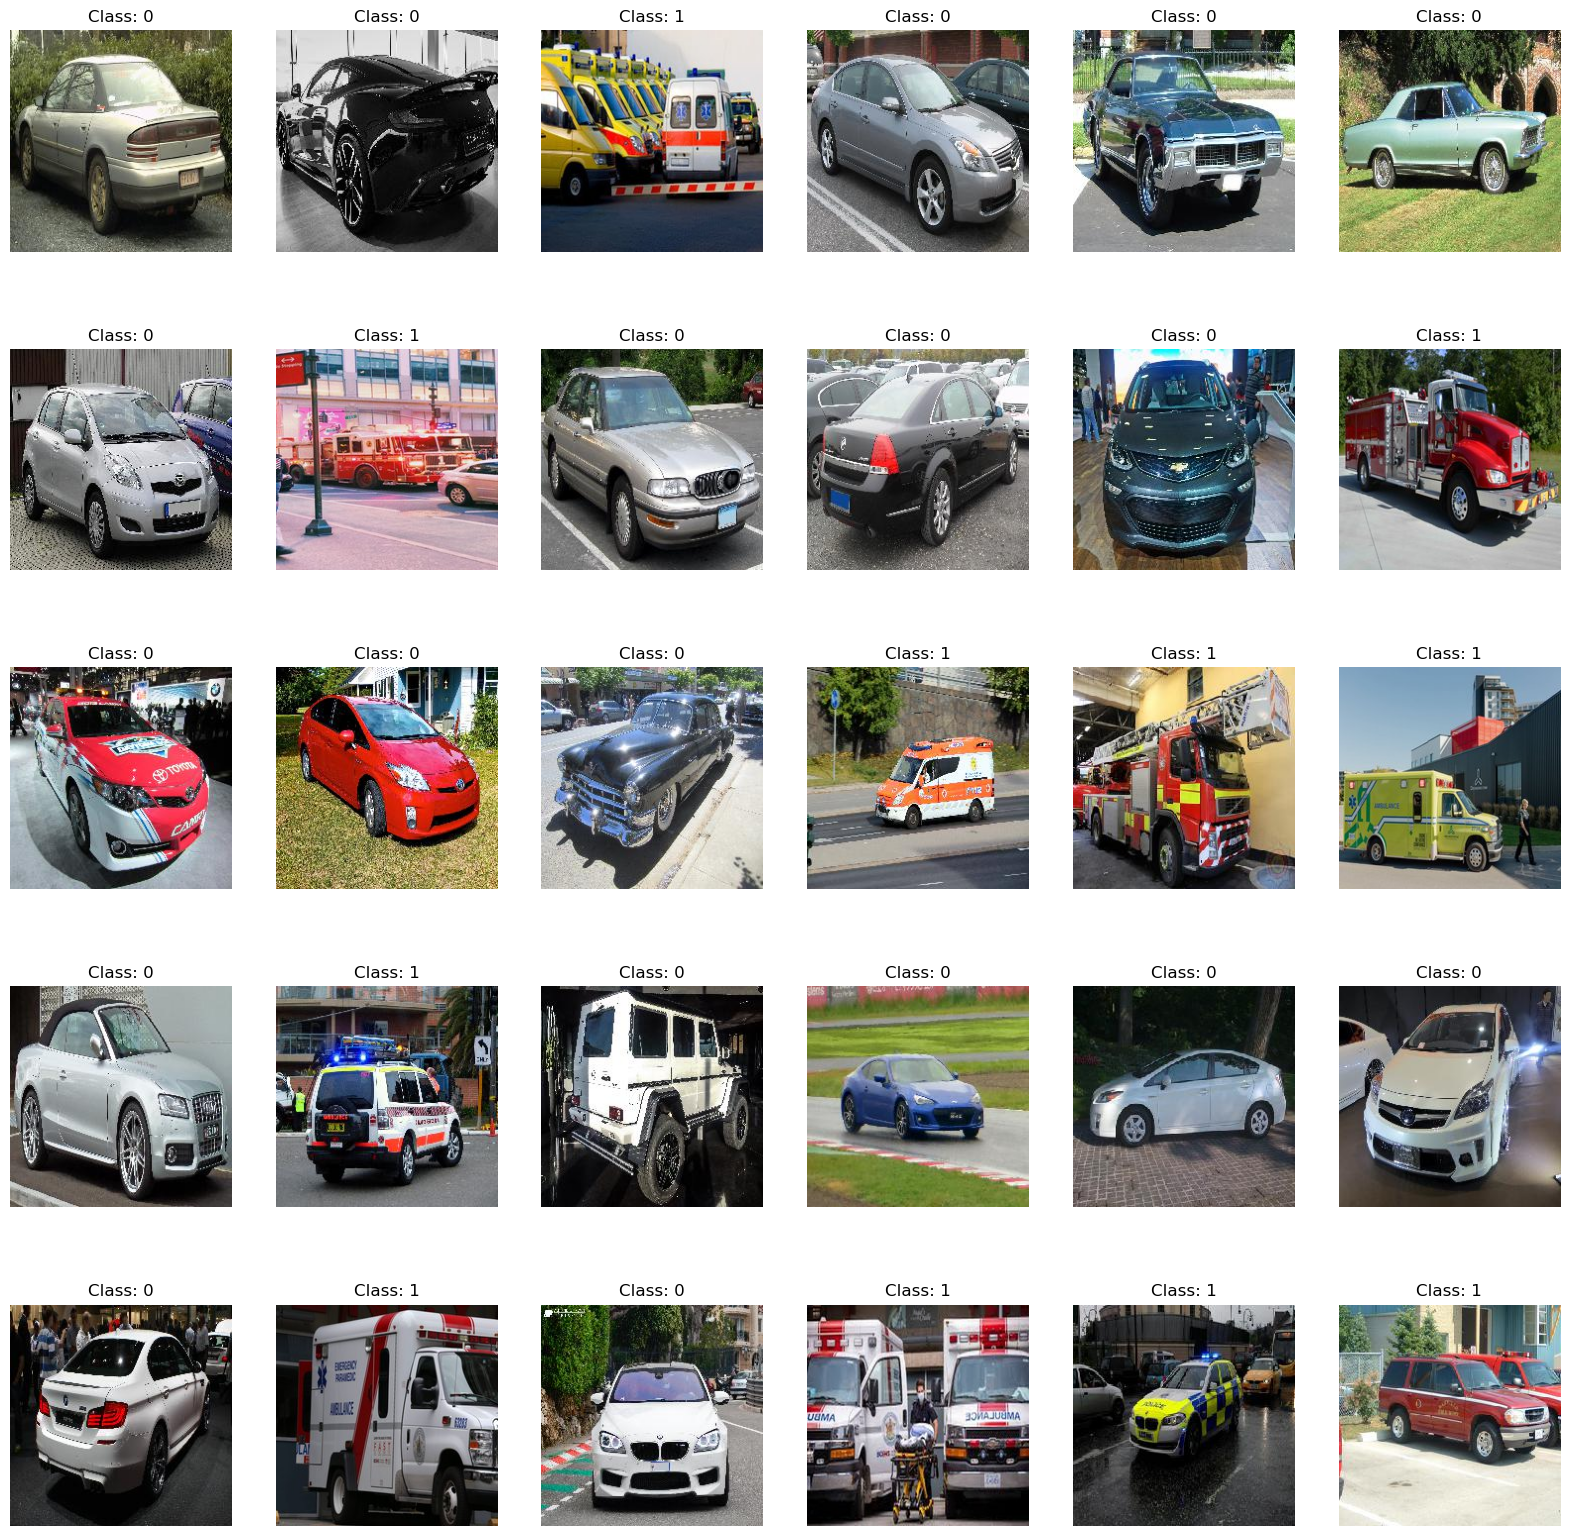

In [8]:
# Displaying 30 images
image_dir = '/train'
sample_images = train_df.sample(30)

plt.figure(figsize=(20, 20))
for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['image_names'])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(5, 6, i+1) # rows and columns
    plt.imshow(img)
    plt.title(f"Class: {row['emergency_or_not']}")
    plt.axis('off')
plt.show()


In [9]:
# Analyze image dimensions
img_dimensions = []
for img_name in tqdm(train_df['image_names']):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)
    if img is not None:
        img_dimensions.append(img.shape)

img_dimensions_df = pd.DataFrame(img_dimensions, columns=['Height', 'Width', 'Channels'])
print(img_dimensions_df.describe())

# Check if all images have the same dimensions and number of channels
print(f"Unique Heights: {img_dimensions_df['Height'].unique()}")
print(f"Unique Widths: {img_dimensions_df['Width'].unique()}")
print(f"Unique Channels: {img_dimensions_df['Channels'].unique()}")


100%|█████████████████████████████████████| 2049/2049 [00:01<00:00, 1675.62it/s]


            Height        Width  Channels
count  2049.000000  2049.000000    2049.0
mean    224.378721   224.680820       3.0
std      16.451071    30.118931       0.0
min     224.000000   224.000000       3.0
25%     224.000000   224.000000       3.0
50%     224.000000   224.000000       3.0
75%     224.000000   224.000000       3.0
max     968.000000  1587.000000       3.0
Unique Heights: [224 968 256]
Unique Widths: [ 224 1587  256]
Unique Channels: [3]


### Data Generators 

In [10]:

# Split the data
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")

# Data generators for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='image_names',
    y_col='emergency_or_not',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='image_names',
    y_col='emergency_or_not',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)


Training set size: 1639
Validation set size: 410
Found 1639 validated image filenames.
Found 410 validated image filenames.


### Model training 

In [ ]:
# Using Various object detect alogrithms such as MobileNetV2, ResNet50 and EfficientNetB0
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# MobileNetV2 model
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=predictions)
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history_mobilenet = model_mobilenet.fit(train_generator, validation_data=validation_generator, epochs=10)
# Save MobileNetV2 model
# model_mobilenet.save('mobilenet_v1.h5')

# ResNet50 model training
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions)
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history_resnet = model_resnet.fit(train_generator, validation_data=validation_generator, epochs=10)
#model_resnet.save('resnet50_v1.h5')

## EfficientNetB0 model training
from tensorflow.keras.applications import EfficientNetB0

base_model_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model_efficientnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model_efficientnet = Model(inputs=base_model_efficientnet.input, outputs=predictions)
model_efficientnet.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history_efficientnet = model_efficientnet.fit(train_generator, validation_data=validation_generator, epochs=10)

# Save EfficientNetB0 model
#model_efficientnet.save('efficientnet_v1.h5')


# Model evaluations 
val_loss_mobilenet, val_accuracy_mobilenet = model_mobilenet.evaluate(validation_generator)
print(f"MobileNetV2 Validation Loss: {val_loss_mobilenet}")
print(f"MobileNetV2 Validation Accuracy: {val_accuracy_mobilenet}")

val_loss_resnet, val_accuracy_resnet = model_resnet.evaluate(validation_generator)
print(f"ResNet50 Validation Loss: {val_loss_resnet}")
print(f"ResNet50 Validation Accuracy: {val_accuracy_resnet}")

val_loss_efficientnet, val_accuracy_efficientnet = model_efficientnet.evaluate(validation_generator)
print(f"EfficientNetB0 Validation Loss: {val_loss_efficientnet}")
print(f"EfficientNetB0 Validation Accuracy: {val_accuracy_efficientnet}")



#### MobileNetV2 outperformed the other models significantly, achieving a high validation accuracy of 96.10% and the lowest validation loss of 0.24. This suggests that MobileNetV2 is the most effective model for this particular task. 

#### ResNet50 and EfficientNetB0 both showed moderate performance, with validation accuracies of 66.83% and 51.22% respectively. The higher loss values for these models suggest they struggled more with the dataset, potentially due to overfitting or insufficient tuning.

### Model Testing and Evaluating

In [13]:
test_image_dir = '/Users/cgp/Downloads/Emergency_Vehicles/test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_image_dir,
    x_col='image_names',
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No labels available in the test set
    shuffle=False
)

import tensorflow as tf
# Load the trained models
model_mobilenet = tf.keras.models.load_model('mobilenet_v1.h5')
model_resnet = tf.keras.models.load_model('resnet50_v1.h5')
model_efficientnet = tf.keras.models.load_model('efficientnet_v1.h5')

predictions_mobilenet = model_mobilenet.predict(test_generator)
predictions_mobilenet = (predictions_mobilenet > 0.5).astype(int)

predictions_resnet = model_resnet.predict(test_generator)
predictions_resnet = (predictions_resnet > 0.5).astype(int)

predictions_efficientnet = model_efficientnet.predict(test_generator)
predictions_efficientnet = (predictions_efficientnet > 0.5).astype(int)

print("MobileNetV2 Predictions:")
print(predictions_mobilenet[:10])
print()

print("ResNet50 Predictions:")
print(predictions_resnet[:10])
print()

print("EfficientNetB0 Predictions:")
print(predictions_efficientnet[:10])
print()


Found 706 validated image filenames.


23/23 [==============================] - 21s 895ms/step
MobileNetV2 Predictions:
[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]]

ResNet50 Predictions:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

EfficientNetB0 Predictions:
[[0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]



### Indepth Model output analysis 

In [26]:
model_mobilenet = tf.keras.models.load_model('mobilenet_v1.h5')
model_resnet = tf.keras.models.load_model('resnet50_v1.h5')
model_efficientnet = tf.keras.models.load_model('efficientnet_v1.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image
    return img_array

def predict_image(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Predict with MobileNetV2
    predictions_mobilenet = model_mobilenet.predict(img_array)
    confidence_mobilenet = predictions_mobilenet[0][0]
    predicted_class_mobilenet = 'Emergency' if confidence_mobilenet > 0.5 else 'Non-Emergency'

    # Predict with ResNet50
    predictions_resnet = model_resnet.predict(img_array)
    confidence_resnet = predictions_resnet[0][0]
    predicted_class_resnet = 'Emergency' if confidence_resnet > 0.5 else 'Non-Emergency'

    # Predict with EfficientNetB0
    predictions_efficientnet = model_efficientnet.predict(img_array)
    confidence_efficientnet = predictions_efficientnet[0][0]
    predicted_class_efficientnet = 'Emergency' if confidence_efficientnet > 0.5 else 'Non-Emergency'

    print("MobileNetV2 Prediction:")
    print(f"Confidence Score: {confidence_mobilenet}")
    print(f"Predicted Class: {predicted_class_mobilenet}\n")

    print("ResNet50 Prediction:")
    print(f"Confidence Score: {confidence_resnet}")
    print(f"Predicted Class: {predicted_class_resnet}\n")

    print("EfficientNetB0 Prediction:")
    print(f"Confidence Score: {confidence_efficientnet}")
    print(f"Predicted Class: {predicted_class_efficientnet}\n")

# Path to the image you want to predict
img_path = '/Users/cgp/Downloads/Emergency_Vehicles/test/173.jpg'
predict_image(img_path)


1/1 [==============================] - 1s 664ms/step
MobileNetV2 Prediction:
Confidence Score: 0.9981616735458374
Predicted Class: Emergency

ResNet50 Prediction:
Confidence Score: 8.438457825832302e-07
Predicted Class: Non-Emergency

EfficientNetB0 Prediction:
Confidence Score: 0.28326165676116943
Predicted Class: Non-Emergency



#### MobileNetV2 predicts the image as an emergency vehicle with a confidence score of 0.9982, indicating strong detection capabilities for emergency markers like police lights. ResNet50 and EfficientNetB0 classify the image as non-emergency, with ResNet50 showing an extremely low confidence score and EfficientNetB0 displaying moderate uncertainty. MobileNetV2 demonstrates superior performance and will be used for a multi-class vehicle detector, showing strong potential for accurately identifying different types of emergency vehicles.

#### To enhance this implementation further, a multiclass vehicle detector was developed. At this stage, each vehicle's image in the training dataset was assigned a vehicle type. These vehicle types include Normal Vehicle, Police Car, Ambulance, and Fire Truck. Additionally, more images were added to the training dataset to make sure training dataset is balance in . The updated training dataset can be found in the train_vt_final.csv file.

### Model Improvement

(3979, 3)


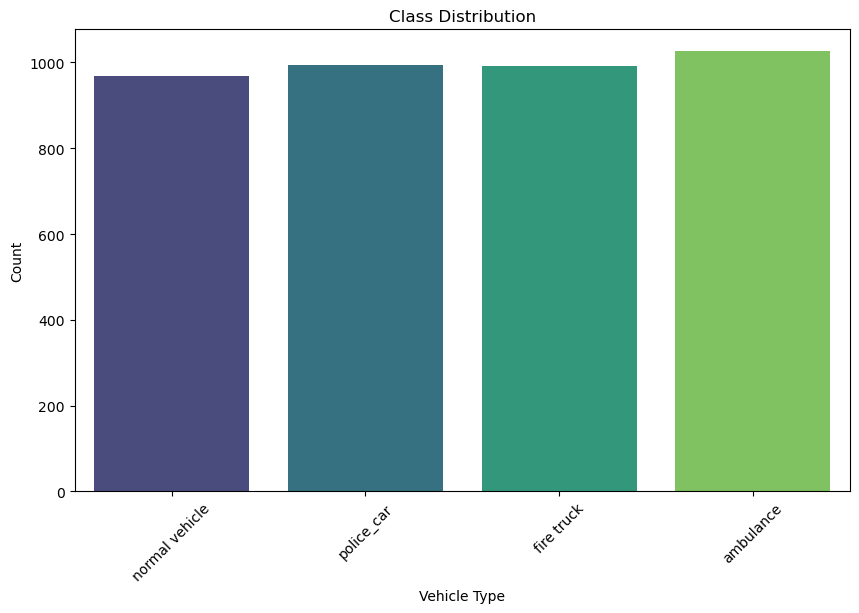

ambulance         1026
police_car         994
fire truck         991
normal vehicle     968
Name: vehicle_type, dtype: int64


In [18]:
train_df = pd.read_csv('/Users/cgp/Desktop/train_vt_final.csv')
print(train_df.shape)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='vehicle_type', palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the number of images in each class
class_counts = train_df['vehicle_type'].value_counts()
print(class_counts)


#### The dataset now has a well-balanced class distribution across four vehicle types: ambulance, police car, fire truck, and normal vehicle. This balanced distribution ensures the model's performance, reducing the likelihood of overfitting to any one class and resulting in more accurate predictions.

Found 2643 validated image filenames belonging to 4 classes.
Found 661 validated image filenames belonging to 4 classes.


Epoch 1/10
83/83 [==============================] - 126s 1s/step - loss: 0.4451 - accuracy: 0.8422 - val_loss: 0.4928 - val_accuracy: 0.8427
Epoch 2/10
83/83 [==============================] - 111s 1s/step - loss: 0.1173 - accuracy: 0.9614 - val_loss: 0.5234 - val_accuracy: 0.8457
Epoch 3/10
83/83 [==============================] - 112s 1s/step - loss: 0.0468 - accuracy: 0.9864 - val_loss: 0.8524 - val_accuracy: 0.8139
Epoch 4/10
83/83 [==============================] - 107s 1s/step - loss: 0.0240 - accuracy: 0.9943 - val_loss: 0.6364 - val_accuracy: 0.8699
Epoch 5/10
83/83 [==============================] - 105s 1s/step - loss: 0.0250 - accuracy: 0.9898 - val_loss: 0.6381 - val_accuracy: 0.8729
Epoch 6/10
83/83 [==============================] - 105s 1s/step - loss: 0.0160 - accuracy: 0.9939 - val_loss: 0.4971 - val_accuracy: 0.9017
Epoch 7/10
83/83 [==============================] - 119s 1s/step - loss: 0.0265 - accuracy: 0.9905 - val_loss: 0.9465 - val_accuracy: 0.8290
Epoch 8/10
83

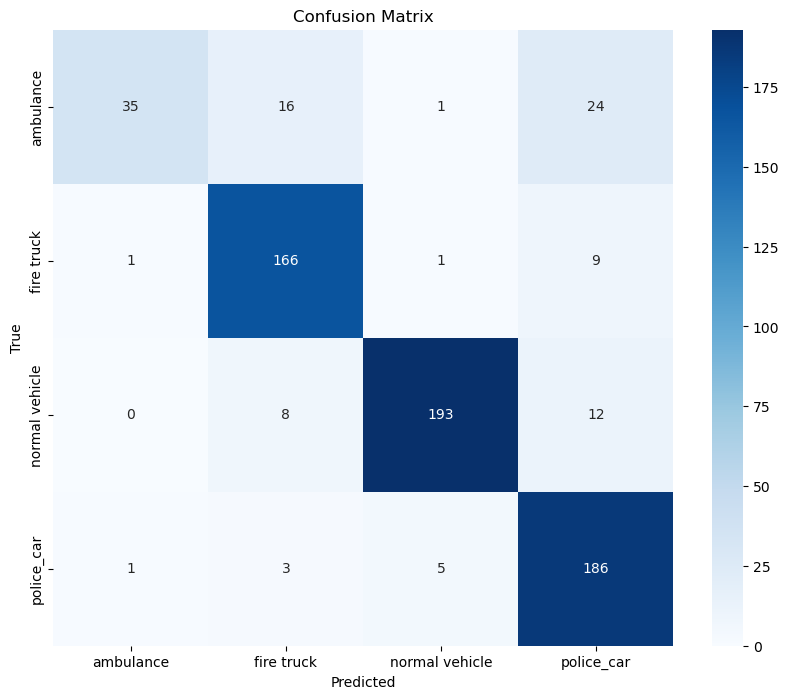

In [2]:
import pandas as pd
import numpy as np
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('/Users/cgp/Desktop/train_vt_final.csv')

# Remove invalid filenames
train_df = train_df[train_df['image_names'].apply(lambda x: os.path.exists(f"/Users/cgp/Downloads/Emergency_Vehicles/train/{x}"))]

# Split the data
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Data generators for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='/Users/cgp/Downloads/Emergency_Vehicles/train',
    x_col='image_names',
    y_col='vehicle_type',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='/Users/cgp/Downloads/Emergency_Vehicles/train',
    x_col='image_names',
    y_col='vehicle_type',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure that shuffling is disabled
)

# Build the model using MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_df['vehicle_type'].unique()), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predict the labels for the validation set
val_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='/Users/cgp/Downloads/Emergency_Vehicles/train',
    x_col='image_names',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

val_predictions = model.predict(val_generator)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Ensure the number of predictions matches the number of true labels
if len(val_predictions_classes) != len(val_data):
    raise ValueError(f"Inconsistent number of samples: {len(val_predictions_classes)} predictions vs {len(val_data)} true labels")

true_classes = val_data['vehicle_type'].map(train_generator.class_indices).values

# Classification report
class_report = classification_report(true_classes, val_predictions_classes, target_names=list(train_generator.class_indices.keys()))
print("Classification Report:\n", class_report)

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, val_predictions_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Model Evaluation and Analysis

Model Validation and Classification Report

• Validation accuracy of 87.75% indicates effective vehicle classification.
• Areas for improvement:
   - Ambulance: Low recall (46%), often misclassifies ambulances as other vehicles.
   - Fire Truck: High recall (94%), good at identifying fire trucks.
   - Normal Vehicle: Strong recall (91%), misclassifications between normal vehicles and police cars.
   - Police Car: High recall (95%), rarely misclassifies police cars.
• Overall F1-score of 0.87 indicates balance between precision and recall.
• Ambulance imbalance suggests further tuning or additional training data might improve model performance.

The overall weighted average F1-score is **0.87**, which indicates a good balance between precision and recall across all classes. However, the imbalance in recall for ambulances suggests that further tuning or additional training data for this class might improve the model's performance.


In [3]:
#model.save('mobilenet_deted.h5')

/Users/cgp/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Emergency Vehicle Detection and Classification

In [11]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained MobileNetV2 model
model_mobilenet = tf.keras.models.load_model('mobilenet_deted.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Rescale the image
    return img_array

def predict_image(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Predict with MobileNetV2
    predictions_mobilenet = model_mobilenet.predict(img_array)
    confidence_mobilenet = np.max(predictions_mobilenet)
    predicted_class_mobilenet = np.argmax(predictions_mobilenet)
    class_labels = {0: 'Normal Vehicle', 1: 'Ambulance', 2: 'Fire Truck', 3: 'Police Car'}
    
    # Print the results
    print("MobileNetV2 Prediction:")
    print(f"Confidence Score: {confidence_mobilenet}")
    print(f"Predicted Class: {class_labels[predicted_class_mobilenet]}\n")

# Path to the image you want to predict
img_path = '/Users/cgp/Downloads/Emergency_Vehicles/test/2349.jpg'

# Predict and display results
predict_image(img_path)

1/1 [==============================] - 0s 374ms/step
MobileNetV2 Prediction:
Confidence Score: 0.999992847442627
Predicted Class: Normal Vehicle



In [4]:
import cv2
import numpy as np
import tensorflow as tf
import os  # For sending notifications using osascript

# Load the trained MobileNetV2 model
model_mobilenet = tf.keras.models.load_model('mobilenet_deted.h5')

# Preprocess a single frame
def preprocess_frame(frame):
    img_array = cv2.resize(frame, (224, 224))
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make predictions on a single frame
def predict_frame(frame):
    img_array = preprocess_frame(frame)

    # Predict with MobileNetV2
    predictions_mobilenet = model_mobilenet.predict(img_array)
    confidence_mobilenet = np.max(predictions_mobilenet)
    predicted_class_mobilenet = np.argmax(predictions_mobilenet)
    class_labels = {0: 'Normal Vehicle', 1: 'Ambulance', 2: 'Fire Truck', 3: 'Police Car'}
    
    return confidence_mobilenet, class_labels[predicted_class_mobilenet]

# Function to send a desktop notification using osascript
def send_notification(title, message):
    os.system(f"osascript -e 'display notification \"{message}\" with title \"{title}\"'")

# Path to the video file
video_path = '/Users/cgp/Downloads/Video_testers/t2.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    confidence_score, predicted_class = predict_frame(frame)

    # Display the prediction on the frame
    cv2.putText(frame, f"Class: {predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, f"Confidence: {confidence_score:.2f}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Send a notification if an emergency vehicle is detected with high confidence
    if confidence_score > 0.60 and predicted_class in ['Ambulance', 'Fire Truck', 'Police Car']:
        send_notification("Emergency Vehicle Detected", f"{predicted_class} detected with confidence {confidence_score:.2f}")
    cv2.imshow('Emergency Vehicle Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video and close windows
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


### Future Improvement
Model Improvement: Further fine-tuning the model to enhance its ability to distinguish between similar-looking vehicles, such as different types of emergency vehicles. This could involve experimenting with more advanced architectures or adding more layers to the current model to capture finer details in the images.

Real-Time Camera Input: Extend the current implementation to handle real-time video feeds from a camera. This would enable the model to detect emergency vehicles in real-time as they pass by, making the application more practical for use in real-world scenarios, such as traffic monitoring or automated driving systems.

Data Augmentation: Introduce advanced data augmentation techniques to artificially increase the size of the training dataset. This could include applying random rotations, scaling, and color adjustments to the images, which would help the model generalize better and perform more robustly on unseen data.